In [1]:
!pip install gmplot
import gmplot
import pandas as pd
import numpy as np

     |████████████████████████████████| 164 kB 2.3 MB/s eta 0:00:01
You should consider upgrading via the '/Users/francesco/.pyenv/versions/miniconda3-latest/bin/python -m pip install --upgrade pip' command.


In [15]:
url ='https://docs.google.com/spreadsheets/d/1iYHApNr4LjZWybk2O5tKI4NgxQX_0mG0j-KXId2r47A/export?format=csv&gid=0'

df = pd.read_csv(url)
df['Subjects (max 3 items)']= df['Subjects (max 3 items)'].str.lower()

In [3]:
df

,Name,Surname,Subjects (max 3 items),City,Country,Can help with (max 3 items)
0,Francesco,Turci,"disordered systems, soft matter, computational...",Bristol,UK,"editing, IT support, graphics"
1,Gianni,Petrella,"mathematics, physics, computer science",Brussels,BE,"IT support and maintenance, AI, statistics"
2,Emanuele,Penocchio,"physical chemistry, thermodynamics",Luxembourg,LU,"Festivaletteratura, organization, discussion o..."
3,Fulvio,Paleari,"condensed matter, solid state, computational p...",Roma,IT,"editing, content discussion and production"
4,Riccardo,Impavido,"physics, mathematics, philosophy",Padova,IT,"Writing, workshops"
5,Lavinia,Marziale,"mathematics, computer science, linguistics",Montpellier,FR,"IT support, artistic experiments"
6,Maria Elena,Antinori,"biotechnology, microorganisms",Genova,IT,"workshops, interviews"
7,Elena Alma,Rastello,"book publishing, literature, linguistics",Torino,IT,"communication, discussion of contents"
8,Sara,Dal Cengio,"physics, chemistry",Barcelona,ES,"radio and podcasts, interviews"
9,Danilo,Forastiere,"physical chemistry, thermodynamics",Luxembourg,LU,IT support and maintenance


In [4]:
subj = df['Subjects (max 3 items)']
all_subjs = [s.split(',') for s in subj]
all_subjs = [s.strip() for l in all_subjs for s in l]
all_subjs = " ".join([s.replace(' ', '_').lower() for s in all_subjs])

In [5]:
all_subjs

'disordered_systems soft_matter computational_physics mathematics physics computer_science physical_chemistry thermodynamics condensed_matter solid_state computational_physics physics mathematics philosophy mathematics computer_science linguistics biotechnology microorganisms book_publishing literature linguistics physics chemistry physical_chemistry thermodynamics scientific_communication literature linguistics mathematics philosophy graphics visual_arts thermodynamics disordered_systems'

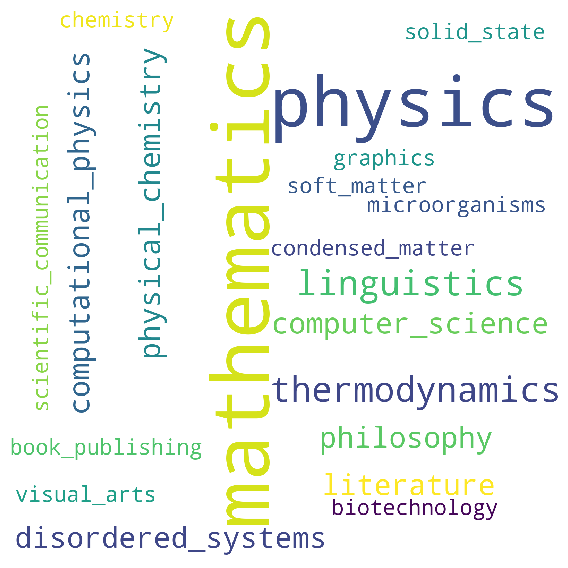

In [9]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 1600, height = 1600, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(all_subjs) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.savefig("wordcloud.png", dpi=300)
plt.show() 


In [10]:
import collections

In [11]:
counts = collections.Counter(all_subjs.split())
counts

Counter({'disordered_systems': 2,
         'soft_matter': 1,
         'computational_physics': 2,
         'mathematics': 4,
         'physics': 3,
         'computer_science': 2,
         'physical_chemistry': 2,
         'thermodynamics': 3,
         'condensed_matter': 1,
         'solid_state': 1,
         'philosophy': 2,
         'linguistics': 3,
         'biotechnology': 1,
         'microorganisms': 1,
         'book_publishing': 1,
         'literature': 2,
         'chemistry': 1,
         'scientific_communication': 1,
         'graphics': 1,
         'visual_arts': 1})

In [12]:
topics = counts.keys()
net = {}
import networkx as nx
G = nx.Graph()

for t in topics:

  # print(t)
  G.add_node(t)
  test = df['Subjects (max 3 items)'].str.contains(t.replace("_"," "))
  for p in df['Surname'][test]:
    # print("    "+p, end=" ")
    connections = df['Subjects (max 3 items)'][df['Surname']==p].iloc[0].split(',')
 
    for c in connections:
      c = c.strip()
      key = c.replace(' ','_')
      # print("->",key)
      if key != t:
        if G.has_edge(t,key)==False or G.has_edge(key,t)==False:
          G.add_edge(t,key,name=p)
        else:
          oldname = G.edges[t,key]['name']
          if p in oldname:
            pass
          else:
            print(G.edges[t,key]['name'])
            G.edges[t,key]['name'] = G.edges[t,key]['name'] + "/\n" + p
            print(G.edges[t,key]['name'])
  # print("\n")

Petrella
Petrella/
Impavido
Petrella
Petrella/
Marziale
Impavido
Impavido/
Galeotti
Turci
Turci/
Paleari
Penocchio
Penocchio/
Forastiere
Rastello
Rastello/
Cinini
Penocchio
Penocchio/
Forastiere
Penocchio
Penocchio/
Forastiere


/Users/francesco/.pyenv/versions/miniconda3-latest/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


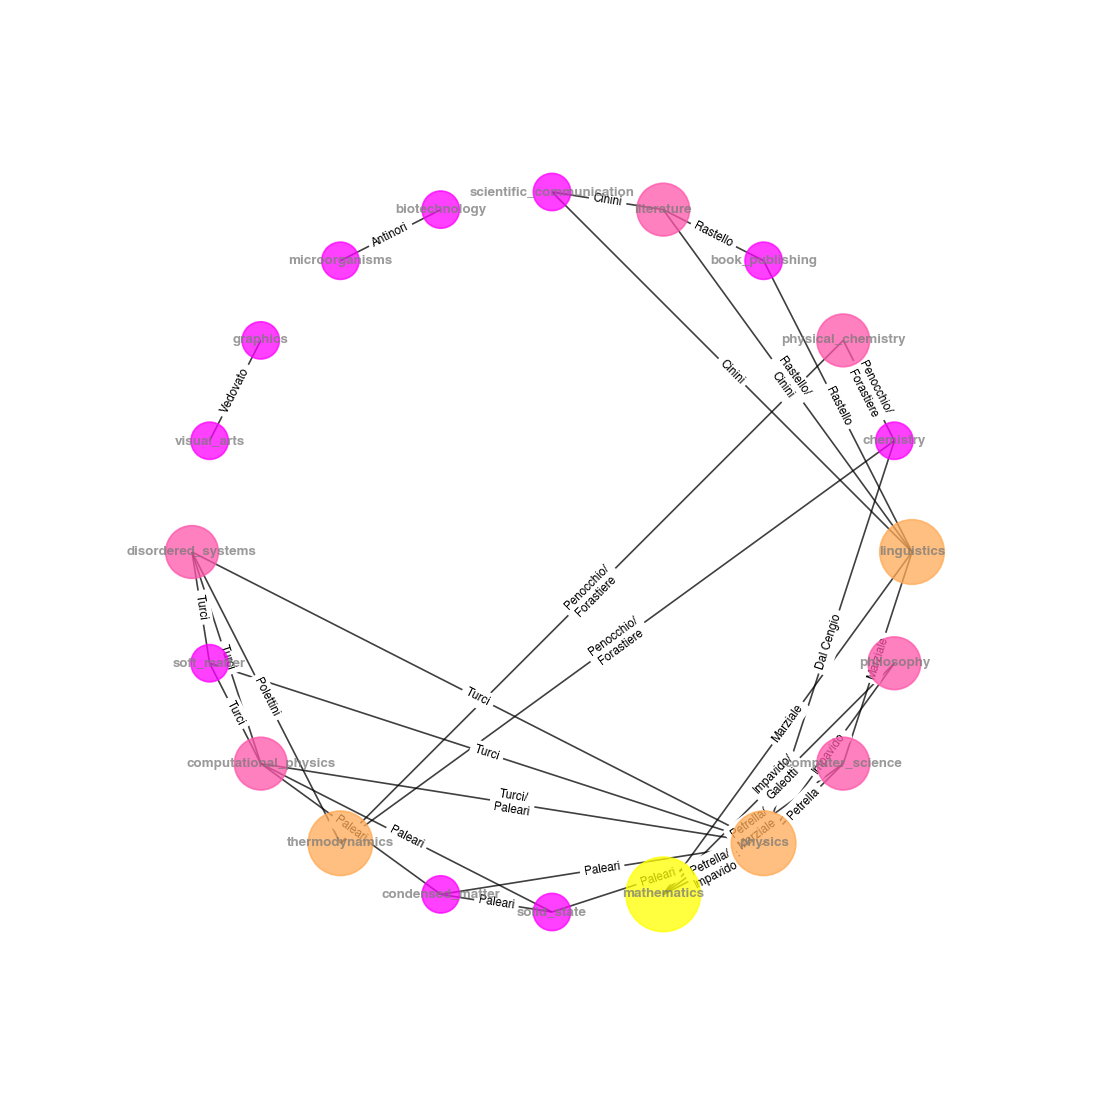

In [13]:
plt.figure(figsize=(9,9 ),dpi=120)
pos=nx.shell_layout(G)
sizes = np.array([dict(counts)[f] for f in list(G.nodes)])*500
nx.draw(G,pos=pos, with_labels=True,  
        font_color='#797979', 
        font_weight='bold',
        font_size=8,
        node_size=sizes,
        node_color=sizes, cmap = plt.cm.spring, alpha=0.75)
nx.draw_networkx_edge_labels(G,pos=pos, edge_labels=nx.get_edge_attributes(G,'name'), font_size=7);
xs = [xx for xx,yy in pos.values()]
ys = [yy for xx,yy in pos.values()]
plt.xlim(1.5*min(xs),1.5*max(xs));
plt.ylim(1.5*min(ys),1.5*max(ys));

In [24]:
# import libraries
import folium
import pandas as pd
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent='http')

In [25]:

 
# Make a data frame with dots to show on the map

locations = [ geolocator.geocode(city) for city in df['City'][df['City'].notnull()]]

unique_locations =[]
for item in locations:
    if item not in unique_locations:
        unique_locations.append(item)

m = folium.Map(location=[47, 3], width=600, height=550,zoom_start=4)
lat,lon, city = [],[], []
for c in unique_locations:
  lat.append(float(c.raw['lat']))
  lon.append(float(c.raw['lon']))

  city.append(c.raw['display_name'].split(',')[0])
geodata = pd.DataFrame()
geodata['lon'], geodata['lat'], geodata['name'] = lon, lat, city

# # I can add marker one by one on the map
for i in range(0,len(geodata)):
  folium.Marker([geodata.iloc[i]['lat'], geodata.iloc[i]['lon']], popup=geodata.iloc[i]['name']).add_to(m)
m.save('output.html')
m

In [26]:
# Make a data frame with dots to show on the map

locations = [ geolocator.geocode(city) for city in df['City'][df['City'].notnull()]]